# Summary
This entire project's purpose is to create a NER system for names, in different languages. In this notebook we first check the names we have got

In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

os.chdir('/home/david/Desktop/projects/NameEmbedding/')

general_config = {
    'training_set_path':"./data/raw/text/training_names_processed.txt",
    'validation_set_path':"./data/raw/text/validation_names_processed.txt",
}

In [16]:


# load data
with open(general_config.get("training_set_path"), "r") as file:
    training_names_txt = [line.strip() for line in file]
with open(general_config.get("validation_set_path"), "r") as file:
    validation_names_txt = [line.strip() for line in file]

training_names_txt = np.array(training_names_txt)
validation_names_txt = np.array(validation_names_txt)

N_train = len(training_names_txt)
N_train_unique = len(np.unique(training_names_txt))
N_val = len(validation_names_txt)
N_val_unique = len(np.unique(validation_names_txt))

print(f'Training: {N_train}, Training (unique): {N_train_unique}, %: {N_train_unique/N_train}')
print(f'Training: {N_val}, Training (unique): {N_val_unique}, %: {N_val_unique/N_val}')



Training: 7892459, Training (unique): 7892459, %: 1.0
Training: 961726, Training (unique): 961726, %: 1.0


# Removing Intersects

In [17]:
intersects = list(set(training_names_txt).intersection(validation_names_txt))
print('Num intersects:', len(intersects))
intersects[:100]

Num intersects: 137985


['',
 'swapnarani',
 'rishaniya',
 'sreejith gopi',
 'ബിന്ദു മണി',
 'മുഹമ്മദ് ദിലീപ്',
 'jishna chandran',
 'jerin prasad',
 'advait',
 'shahala parveen',
 'rasiyabeegum',
 'mohammed sakariya',
 'jithin ajayan',
 'ഗിരീഷ് എൻ',
 'റ്റി സുലേഖ',
 'ലൗലത്ത്',
 'ആതിര ശശി',
 'murshid',
 'വൈശാഖ് പ്രകാശ്',
 'ഫാത്തിമത്ത് സുഹറ പി',
 'അമീല',
 'scaria devasya',
 'sabithamol',
 'വിജയം',
 'abdul assiss',
 'ഹരീഷ് കെ എം',
 'ഓമനക്കുട്ടൻ പി പി',
 'ജയലാൽ എൻ',
 'sreeja sivadasan',
 'കുമാരി ആർ',
 'harshida',
 'മേരി തോമസ്\u200c',
 'privin',
 'sulatha',
 'സുമ എം',
 'ജോർജ് വർഗ്ഗിസ്',
 'വെങ്കട്ടരമണ ഭട്ട്',
 'രഞ്ജിത് എം',
 'നസീർ എം',
 'aswinkumar.',
 'അഞ്ജന കെ ജെ',
 'ജസ്സി റ്റി',
 'sharmila shajahan',
 'സീന സി വി',
 'sunil krishnanunni',
 'മഞ്ചു എൽ എസ്',
 'nowshade',
 'രഞ്ജിത്ത്കുമാർ എം',
 'mobin joy',
 'earnest',
 'ഷക്കീർ കെ',
 'thresya xavier',
 'അമീന സി',
 'റ്റി എം ബഷീർ',
 'arathi.t',
 'സന്തോഷ് എസ്സ്',
 'സാന്ദ്ര',
 'abdul javad',
 'razik',
 'anas.',
 'അനു കൃഷ്ണൻ എസ്',
 'thamson',
 'abdulrassak',
 'saiyed',
 'mo

In [18]:
training_names_txt = training_names_txt.tolist()
training_names_txt = list(set(training_names_txt) - set(intersects))

intersects = list(set(training_names_txt).intersection(validation_names_txt))
print('Num intersects:', len(intersects))
intersects[:100]

Num intersects: 0


[]

In [20]:
N_train = len(training_names_txt)
N_train_unique = len(np.unique(training_names_txt))
N_val = len(validation_names_txt)
N_val_unique = len(np.unique(validation_names_txt))

print(f'Training: {N_train}, Training (unique): {N_train_unique}, %: {N_train_unique/N_train}')
print(f'Training: {N_val}, Training (unique): {N_val_unique}, %: {N_val_unique/N_val}')

Training: 7754474, Training (unique): 7754474, %: 1.0
Training: 961726, Training (unique): 961726, %: 1.0


### Save new Train

In [21]:
# with open("./data/raw/text/training_names_processed_corrected.txt", "w") as f:
#     for item in training_names_txt:
#         f.write(f"{item}\n")


### Load

In [2]:
with open("./data/raw/text/training_names_processed_corrected.txt", "r") as f:
    loaded_list = [line.strip() for line in f]
loaded_list[:10]

['ജോൺ.കെ.ബി',
 'sahad salam',
 'hajisheykhi',
 'റസിയ നൂർജഹാൻ',
 'ജോസഫ് എ.എ',
 'olivarria',
 'ശില് പി കെ',
 'lehad',
 'pakaneh',
 'സമീന്ദ്രൻ.എൻ.കെ']

In [24]:
loaded_list == training_names_txt

True

# How many "very close" names are there, between the train and val sets

In [5]:
import re
def func(x):
    return re.sub(r'[^a-zA-Z0-9]', '', x)

training_names_txt_no_unique = [func(x) for x in training_names_txt]
training_names_txt[:14], [func(x) for x in training_names_txt[:14]]


(['ജോൺ.കെ.ബി',
  'sahad salam',
  'hajisheykhi',
  'റസിയ നൂർജഹാൻ',
  'ജോസഫ് എ.എ',
  'olivarria',
  'ശില് പി കെ',
  'lehad',
  'pakaneh',
  'സമീന്ദ്രൻ.എൻ.കെ',
  'മുഹമ്മദ് ഷുഹൈബ് കെ കെ',
  'bohálová',
  'ജോസഫ് പോൾ കെ',
  'haseena c.k'],
 ['',
  'sahadsalam',
  'hajisheykhi',
  '',
  '',
  'olivarria',
  '',
  'lehad',
  'pakaneh',
  '',
  '',
  'bohlov',
  '',
  'haseenack'])

# Similarity

In [3]:
with open(general_config.get("validation_set_path"), "r") as file:
    validation_names_txt = [line.strip() for line in file]
validation_names_txt[:10]

['',
 'thyler',
 'വന്ദന.ജി',
 'zaochinskii',
 'ഷൈലേഷ് എസ് കെ',
 'm.asees',
 'marechal',
 'shinin raj',
 'beema rahim',
 'പവിശ്രീ']

In [4]:
import Levenshtein

def top_k_closest_strings_with_distances(target, strings, k=5):
    # Calculate the Levenshtein distance for each string
    distances = [(s, Levenshtein.distance(target, s)) for s in strings]
    # Sort by distance (smaller is better) and select the top k
    top_k = sorted(distances, key=lambda x: x[1])[1:(k+1)]
    return top_k  # Return string-distance pairs


res = {}
for j in tqdm(range(300)):
    ind = np.random.randint(0,len(validation_names_txt), 1)[0]
    res[validation_names_txt[ind]] = top_k_closest_strings_with_distances(validation_names_txt[ind], validation_names_txt)
# print('sahad salam:', top_k_closest_strings_with_distances('sahad salam', validation_names_txt))
# print('ജോൺ.കെ.ബി:', top_k_closest_strings_with_distances('ജോൺ.കെ.ബി', validation_names_txt))

res

100%|██████████| 300/300 [02:28<00:00,  2.01it/s]


{'shariq': [('sharin', 1),
  ('sharil', 1),
  ('thariq', 1),
  ('sharik', 1),
  ('sharij', 1)],
 'khodiev': [('khodeev', 1),
  ('rhodie', 2),
  ('koriev', 2),
  ('khajiev', 2),
  ('kotiev', 2)],
 'mandania': [('mandavia', 1),
  ('antania', 2),
  ('mandanà', 2),
  ('dardania', 2),
  ('nandani', 2)],
 'toniolatti': [('bongiolatti', 2),
  ('toffoletti', 3),
  ('rondolotti', 3),
  ('cacciolatti', 4),
  ('tagliolatto', 4)],
 'agnesens': [('agness', 2),
  ('agnees', 2),
  ('ahsens', 3),
  ('ansen', 3),
  ('consens', 3)],
 'ഭാസ്ക്കരൻ ചെട്ടി': [('ഭാസ്ക്കരൻ കെ ടി', 3),
  ('ഭാസ്ക്കരഷെട്ടി', 3),
  ('ഭാസ്ക്കരൻ ടി', 4),
  ('ഭാസ്ക്കരൻ മൂപ്പർ', 5),
  ('ഭാസ്ക്കരൻ വി', 5)],
 'ഹസ്സീർ': [('ഹസ്സീം', 1),
  ('അസ്സീല', 2),
  ('ജസ്റീർ', 2),
  ('ഹസ്സൽ', 2),
  ('ജസ്സോർ', 2)],
 'samuel daniyel': [('samuel maniyan', 3),
  ('samuel manuel', 3),
  ('sanal daniel', 4),
  ('nebul daniyel', 4),
  ('sabudaniyel', 4)],
 'tekalegne': [('tegegne', 3),
  ('pralene', 4),
  ('tanene', 4),
  ('taline', 4),
  ('telega', 4)],
 

In [10]:
res_no_num = res.copy()
for k in res_no_num.keys():
    res_no_num[k] = [x[0] for x in res_no_num[k]]
res_no_num_df = pd.DataFrame(res_no_num) # .to_csv('/home/david/Desktop/projects/NameEmbedding/data/testing/close_names.csv', index=False)
res_no_num_df

,shariq,khodiev,mandania,toniolatti,agnesens,ഭാസ്ക്കരൻ ചെട്ടി,ഹസ്സീർ,samuel daniyel,tekalegne,വത്സല എൻ,...,basil saji varghese,anjuna kumar,afthab sharon,xlooting,anju sankar,yanet,നാച്ചിയാർ,തമ്പായി കെ പി,sariga joy,അനു അശോക് സി.എ.
0,sharin,khodeev,mandavia,bongiolatti,agness,ഭാസ്ക്കരൻ കെ ടി,ഹസ്സീം,samuel maniyan,tegegne,വത്സല എം,...,basil k. varghese,anjana kumar,anas sharon,looling,anu sankar,qanet,നാച്ച്യാർ,തമ്പായി പി പി,sariga roy,അയന അശോക് സി.എം
1,sharil,rhodie,antania,toffoletti,agnees,ഭാസ്ക്കരഷെട്ടി,അസ്സീല,samuel manuel,pralene,വത്സല എ.,...,akil sam varghese,anju kumar,afthab ahamed,lofting,manju sankar,yanhet,നാച്ചിമോൾ,റപ്പായി കെ പി,sarika joy,അനു അശോക് കെ വി
2,thariq,koriev,mandanà,rondolotti,ahsens,ഭാസ്ക്കരൻ ടി,ജസ്റീർ,sanal daniel,tanene,വത്സല എസ്,...,anil sam varghese,ajana kumar,afthab khader,xlaobing,manjusankar,janet,നാച്ചാൾ,തമ്പായി കെ കെ,sari joy,അതുൽ അശോക് സി
3,sharik,khajiev,dardania,cacciolatti,ansen,ഭാസ്ക്കരൻ മൂപ്പർ,ഹസ്സൽ,nebul daniyel,taline,വത്സലേശൻ,...,basil ke varghese,anjana kumari,akshay shajin,blooming,appu sankar,yavet,നാച്ചാൽ,തമ്പായ് പി പി,mariya joy,അനുശ്രീ സി.എ
4,sharij,kotiev,nandani,tagliolatto,consens,ഭാസ്ക്കരൻ വി,ജസ്സോർ,sabudaniyel,telega,വത്സല ജെ,...,ragi sara varghese,ajun kumar,roshna sharon,clouting,manu sankar,matet,പാച്ചി സി,റപ്പായി കെ ജി,sania joy,അനു അശോക്പോൾ


In [12]:
import pandas as pd

long_df = res_no_num_df.melt(var_name='group', value_name='name')
long_df.to_csv('/home/david/Desktop/projects/NameEmbedding/data/testing/close_names_long.csv', index=False)
long_df

,group,name
0,shariq,sharin
1,shariq,sharil
2,shariq,thariq
3,shariq,sharik
4,shariq,sharij
...,...,...
1495,അനു അശോക് സി.എ.,അയന അശോക് സി.എം
1496,അനു അശോക് സി.എ.,അനു അശോക് കെ വി
1497,അനു അശോക് സി.എ.,അതുൽ അശോക് സി
1498,അനു അശോക് സി.എ.,അനുശ്രീ സി.എ


/home/david/anaconda3/envs/demo_env/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 3370 (\N{MALAYALAM LETTER PA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/david/anaconda3/envs/demo_env/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Malayalam natively.
  fig.canvas.draw()
/home/david/anaconda3/envs/demo_env/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 3391 (\N{MALAYALAM VOWEL SIGN I}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/david/anaconda3/envs/demo_env/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 3359 (\N{MALAYALAM LETTER TTA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/david/anaconda3/envs/demo_env/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 3368 (\N{MALAYALAM LETTER NA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/david/anaconda3/envs/demo_env/lib/python3.12/site-pac

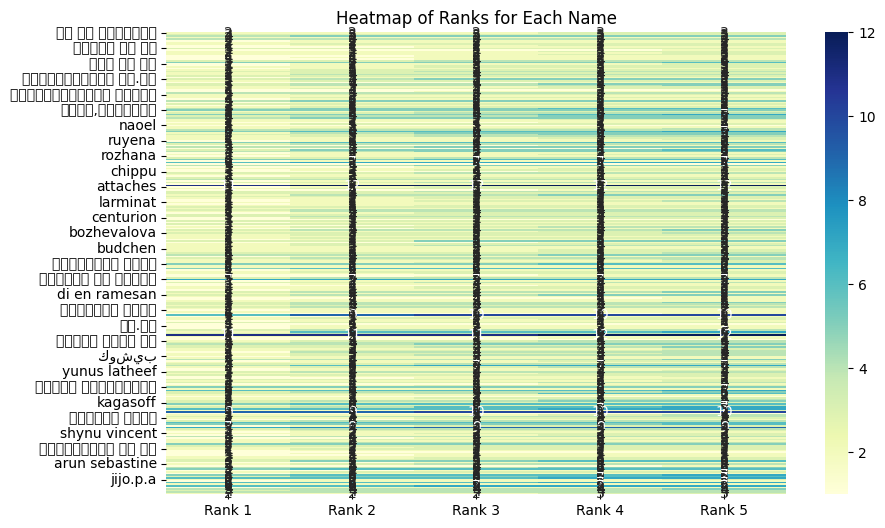

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data: Names and corresponding ranks
data = [(name, [rank for _, rank in ranks]) for name, ranks in res.items()]


# Create a DataFrame
df = pd.DataFrame(res, columns=['Name', 'Ranks'])

# Expand the ranks into separate columns
df_ranks = df.explode('Ranks').reset_index(drop=True)

df_heatmap = pd.DataFrame([ranks for _, ranks in data], columns=[f'Rank {i+1}' for i in range(5)], index=[name for name, _ in data])

plt.figure(figsize=(10, 6))
sns.heatmap(df_heatmap, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Heatmap of Ranks for Each Name')
plt.show()

# Save Samples
Working with millions of names is too costly. Let's develop on smaller sets and scale up later

In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

os.chdir('/home/david/Desktop/projects/NameEmbedding/')

general_config = {
    'training_set_path':"./data/raw/text/training_names_processed_corrected.txt",
    'validation_set_path':"./data/raw/text/validation_names_processed.txt",
}

# load data
with open(general_config.get("training_set_path"), "r") as file:
    training_names_txt = [line.strip() for line in file]
with open(general_config.get("validation_set_path"), "r") as file:
    validation_names_txt = [line.strip() for line in file]

N_train = len(training_names_txt)
N_train_unique = len(np.unique(training_names_txt))
N_val = len(validation_names_txt)
N_val_unique = len(np.unique(validation_names_txt))

print(f'Training: {N_train}, Training (unique): {N_train_unique}, %: {N_train_unique/N_train}')
print(f'Training: {N_val}, Training (unique): {N_val_unique}, %: {N_val_unique/N_val}')


Training: 7754474, Training (unique): 7754474, %: 1.0
Training: 961726, Training (unique): 961726, %: 1.0


In [23]:
with open("./data/raw/text/training_names_processed_10k.txt", "w") as f:
    for item in training_names_txt[:10_000]:
        f.write(f"{item}\n")
with open("./data/raw/text/validation_names_10k.txt", "w") as f:
    for item in validation_names_txt[:10_000]:
        f.write(f"{item}\n")


In [16]:
neighbors = [35, 50, 60, 75, 90]
mid_neighbor = np.median(neighbors)
mid_neighbor

60.0

# Save data for binary task
Names vs no names
#### ChatGPT Querry
```
I want to build a classifier that takes names and words that are not names, and classify them. Here is a list of names. For each name:
1. Detect the language of the name. It might be a name from another language, written in English words. 
2. Match to a word of an object from the language. This object SHOULD NOT BE A NAME. 

Don't return a python code or a description. A successful answer should utilize what you know so far. 
The output should be ONLY a dictionary. Do not include descriptions.

Here are some examples:
{
'വിജിൻ പവിത്രൻ':'വിജിത്രൻ',
'zywert':'zebra',
'ancy scaria': 'sacred',
'landén':'dörr'
}

Here are some names:
```

In [4]:
general_config = {
    'training_set_path':"./data/raw/text/training_names_processed.txt",
    'validation_set_path':"/home/david/Desktop/projects/NameEmbedding/data/raw/text/validation_names_processed.txt",
}
with open(general_config.get("validation_set_path"), "r") as file:
    validation_names_txt = [line.strip() for line in file]
validation_names_txt[1000:1010]

['pathummu padinharevalappil',
 'മുഹമ്മദ് ഹക്തർ കെപി',
 'johncy varghese',
 'mohammed farooque',
 'ഹാരൂൺ മൗലവി',
 'വിജിൻ പവിത്രൻ',
 'അബദുൾ കരിം പി',
 'kartha asha sivasankaran',
 'mohammed shajreel',
 'ancy scaria']

In [22]:
validation_names_txt[770000:770100]


['nobin.g',
 'വിറോണി ഡയ്സി വി ജെ',
 'ivanísio',
 'ഖദിജ.കെ',
 'ആണ്ഡ്രൂൂ ബാബു',
 'ihya',
 'jafaraly',
 'surendra pai',
 'بُعَاصِيريّ',
 'സഞ്ജന പട്ടേൽ',
 'shamla.v',
 'ranjini revi',
 'rasheed kappachali',
 'ഹാരിസ് വി ഹൈദ്രോസ്',
 'ജോയീശ്രീധരൻ',
 'nikpeyma',
 'zelenaia',
 'ആയിഷ റീന',
 'dasarad',
 'james varghese',
 'അലൻ റ്റി ജേക്കബ്',
 'averinova',
 'ഉസ്മാൻ കണിപ്പൊയിൽ',
 'اغايانيان',
 'dhilrupa',
 'bergeria',
 'ശ്രുതി എസ് പ്രദീപ്',
 'rikisha',
 'ലിജിന സി എസ്',
 'thahira razak',
 'സിമി എസ് ആനന്ദ്',
 'ലത സദാശിവൻ',
 'amal bhash',
 'amal lasar',
 'അന്ന റാഫേൽ',
 'tensae',
 'മറിയ ലിറ്റി',
 'തഹ്സി൯ അഷ്റഫ്',
 'sudeesh',
 'ഷിജിനി സി പിള്ള',
 'ജിന്റു സാറാ ജോയി',
 'ടി.കെ.ദാമോദരൻ നമ്പ്യാർ',
 'balabiyev',
 'ജീന ജോയ്സ്',
 'രജത് രാജ് ആർ കെ',
 'അനിലാകുമാരി ആർ',
 'ലിജോ ജോർജ് മാത്യു',
 'ബൈജൂ പി',
 'mlv',
 'jansiya cherumadathil madari',
 'ലക്ഷ്മി നായർ vp',
 'sahir jamal',
 'സയ്യിദ്മുഹമ്മദ്റിയാസ്',
 'മിന്നി ശാരദ',
 'zerroukhi',
 'sumana. es',
 'അറഫാഖ്',
 'van breda',
 'radhika lekshmi',
 'പുഷ്പവല്ലി എം',
 'a

In [4]:
import pandas as pd
dict1 = {
'jaydean': 'jade',
'ശ്രീന മുരളീധരൻ': 'മുരളി',
'ബാബുരാജൻ': 'രാജൻ',
'അബ്ദുൾ സഹിദ്': 'സഹന',
'നിമീഷ് ജെയിംസ്': 'നിമിത്തം',
'chinnappan.g': 'chini',
'feleppa': 'felpa',
'wendry': 'wind',
'landén': 'lampa',
'തോമസ്സെബാറ്റ്യൻ': 'തൊമ്പൻ',
'സിജോ ഗബ്രീയേൽ': 'സിജന',
'ജോയിസ് ആൻ തോമസ്': 'തോമരം',
'soosa mariyan': 'mariyam',
'jabsar': 'jabber',
'zhaozu': 'zhao',
'abdul latheef p.k': 'latta',
'ശറഫലി പി പി': 'പാൽ',
'സുബൈദ.സി': 'സുപ്രിം',
'shamon': 'shame',
'talvé': 'tallrik',
'അബ്ദുൽ ഗഫൂർ.കെസി': 'ഗഫാന',
'അസ്ക്കർ': 'അസ്ഖാൻ',
'ലയ്ജു അലക്സാണ്ട൪': 'അലങ്കാര',
'അൻഷദ് പി': 'അൻശാം',
'fairfax': 'fairy',
'alanen': 'almanacka',
'chuppunnarat': 'chuppa',
'pretty elezabeth job': 'pretty',
'ജിജേഷ് ജി ആർ': 'ജിജിലി',
'കെ സി ലിജി': 'ലിജ്യം',
'ഡേവിസ് പോൾ. സി.': 'പൊല്ലം',
'betke': 'betyder',
'alex.k.george': 'geometri',
'മുഹമ്മദ് സുറേസ്': 'സുരം',
'vani thomas': 'vantar',
'sudayat': 'sudan',
'nooruddeen saheb': 'نور',
'norheim': 'norway',
'sreeraj.p': 'rajani',
'pathukkudi': 'pathu',
'രാമചന്ദ്രൻ.പി': 'രാമൻ',
'മേരിക്കുട്ടിമാണി': 'കുട്ടി',
'jaimon joseph': 'jovial',
'saihu': 'saiyan',
'sevdalija': 'sevda',
'മനോജ് എസ്.': 'മനോരമ',
'khatiashvili': 'khat',
'vinni peethan': 'peetha',
'സഹിർഷാ കെ': 'സഹനം',
'grötschel': 'gröt',
'leyshath': 'leysha',
'ഷംസു വി കെ': 'ശമനം',
'فرامبتون': 'فراموش',
'noufiyamol.n': 'noufa',
'shivanarayanamurthy': 'shiv',
'പ്രീമ പ്രശാന്തി ക്രാസ്ത': 'ക്രോസ്റ്റ',
'പൗലോസ്.പി.ഡബ്ല്യു': 'പൗരൻ',
'രവീന്ദ്രനാഥമേനോൻ': 'നാഥൻ',
'iich': 'ichthy',
'joseph p. m.': 'joslin',
'tillapaugh': 'till',
'ajeesh.k.m': 'ajeer',
'lakthong': 'lak',
'haimin': 'harmony',
'sr. savoola': 'savor',
'zhelobetskii': 'zebra',
'tabet': 'tablet',
'smitha.ap': 'smithy',
'sheebamendas': 'sheen',
'jamseera': 'jam',
'lhan': 'land',
'jumshath olavankandan': 'jumble',
'സുലൈഖ .കെ .പി': 'സുലീൻ',
'മാശിയത്ത്': 'മാശൽ',
'സയിനോ ജോസഫ്': 'സയനം',
'verweel': 'velvet',
'arundas.p.d': 'dast',
'fornetto': 'forno',
'മാധുരി': 'മാധവ്',
'സനേഷ് പി': 'സനദി',
'മഞ്ചു സിഎം': 'മഞ്ചനം',
'anjusha kt': 'anju',
'മുഹമ്മദ് നൗഫൽ': 'നൗര',
'niyas ali kassim': 'cassia',
'nalio': 'nail',
'shynu salim': 'shy',
'sinto augustin': 'sinus',
'pi.si.chandrika': 'chandra',
'thawinee': 'thaw',
'norachit': 'norad',
'jeeno kurian': 'gene',
'sree subha': 'sreek',
'kuvaenthan': 'kuva',
'ജെസി മോൻസി': 'മോണല',
'അവ്വാബ് റഹ്മാൻ': 'അവധി',
'ബാസിം ബിൻ അബ്ദുൽ ഹമീദ്': 'ബാസിൽ',
'muehlberger': 'mule',
'safna ahamed': 'saffron',
'chikayama': 'chika',
'ജസ്നി എസ്': 'ജസ്നം'
}
dict2 = {
'fouodjio': 'fountain',
'ശ്യാമമോൾ പി എസ്': 'മോളം',
'komprapai': 'kompass',
'nisar hamza': 'nizam',
'dumb': 'dune',
'josy thomas': 'joseph',
'kongcheng': 'kitchen',
'ബഹാബുദ്ധീൻ': 'ബഹലം',
'റീംജേഷ്': 'ജയം',
'дариха': 'дари',
'shibili mon': 'shimmer',
'ഉമൈബത്ത് ബീവി. എം': 'ഉമിനി',
'സിബീഷ് പി എസ്': 'സിബം',
'അനു തങ്കം രാജൻ': 'അനുകൂലം',
'akhil mohammed': 'akhbar',
'abina vs': 'abyss',
'savelier': 'savanna',
'അൻവർ അബ്ദുൾ ഖാദർ പി പി': 'അൻവിക്ഷം',
'namwongsa': 'nam',
'goalbertus': 'goal',
'kanika madan': 'kanji',
'പ്രിജ ജി പിള്ള': 'പിള്ളി',
'blesalski': 'blessing',
'meharoj': 'meadow',
'നദിറ': 'നദി',
'fouragnan': 'four',
'renardy': 'render',
'aisha.t': 'aisle',
'fathimath shahala': 'shah',
'സനീഷ് ഡാനിയേൽ': 'സനകം',
'വൈശാഖ് സി ഡി': 'വൈശാരം',
'ബാലസുന്ദരൻ': 'സുന്ദരം',
'pi.ke.kuriakose': 'കുറുകിൽ',
'ലിലു വിൽസൺ': 'വിൽസേ',
'മുഹമ്മദ് റാഷിദ് സി.': 'റാഷി',
'sasha': 'satin',
'അണിയേരി കൃഷ്ണൻ': 'അണിയർ',
'satitsatian': 'satellite',
'reck': 'rock',
'thushananth': 'thrust',
'vimosh wilson': 'vision',
'theruvakkattil': 'തെരുവ്',
'telma purushothaman': 'purush',
'sunithamol.n.b': 'sunlit',
'achindyaraj unni': 'achieve',
'hugonnier': 'hug',
'kathiraa': 'kathak',
'fr.thomas paikad': 'frame',
'viglis': 'vigil',
'unnimundi': 'mundi',
'അമൽഷാൻ': 'അമരം',
'peimian': 'pebble',
'jayadev muraleedharan': 'jade',
'بليابتريي': 'بلاط',
'karnsunaphat': 'karma',
't.chandrasekharan': 'chandelier',
'ബിനീത് എൻ ബി': 'നീതം',
'akhil das.h': 'akhbar',
'vignato': 'vignette',
'yohannan ps': 'psalm',
'dhanyesh': 'dhanya',
'kalynka': 'kale',
'നീമ ജെ': 'ജലം',
'മഫീന ഷക്കീ൪': 'ഷക്കളം',
'ishah': 'island',
'ബ്രിജേഷ് മോഹൻ': 'മോഹം',
'c.ach.hamsakutti': 'harmony',
'അക്ഷയ് ആനന്ദ് കെ എം': 'ആനന്ദം',
'അസ്ഹർ തസ്നീം': 'അസ്ഖാരം',
'aby sunny': 'abyss',
'جورجيسكو': 'جرجس',
'loerzel': 'lore',
'ഹരിഗോവിനദ് എസ്': 'ഗോവിന്ദം',
'tangumonkem': 'tangent',
'fathima bunayya': 'bun',
'viruvuru': 'virus',
'സൂസൻജോബ്': 'സൂക്ഷ്മം',
'ارميسين': 'ارميز',
'di laora': 'dior',
'desfita': 'design',
'mohammed shafeeque m.m': 'shard',
'ഫസലുൽ ഫാരിസ ടി': 'ഫാരു',
'jishnu kudaliyan': 'kuda',
'sreevidyadevi': 'vidya',
'അഭിഷേക് ടി.എസ്': 'ഭിക്ഷ',
'സി ലിസ്ബാ': 'ലിസ്യം',
'ജോട്ടിതോമസ്': 'ജോതി',
'സിസ്റ്റർ എമരിറ്റ മേരി': 'മേരലം',
'kaltayeva': 'kale',
'revindran nair': 'naive',
'അൽ അമീർ ജെ എം': 'അലമരം',
'ദിജേന്ദ്രലാൽ ജി': 'ലാലം',
'hallerman': 'hall',
'പോന്നബിളി': 'പോൻ',
'ബദർനീസ എം': 'നീസം',
'ആലിയ പി.എ': 'ആലയം',
'siji susan itti': 'sustain',
'samitha bava': 'samba',
'goiteom': 'goal',
'bargues': 'bargain'
}
dict3 = {
'മെഹബുബ് പി': 'പുബ്ബ',
'colwick': 'colt',
'ke.k.kumaran': 'kumara',
'lamboux': 'lamb',
'puthukkudi santha': 'kudi',
'ചെറിയമ്മ അമ്മ': 'ചെറിയ',
'റഫ പി': 'റഫാം',
'بوزوبع': 'بوز',
'murmann': 'murmur',
'du park': 'park',
'അസ്മാബി ആ൪ പി': 'ആസ്മം',
'മോബിൻ.പി.എം': 'മോബൈൽ',
'jeejalatha': 'jeeva',
'cidineis': 'cider',
'tharehallimata': 'thar',
'കെ മഷൂദ്': 'മഷം',
'thanky amma': 'thank',
'afsal abdul gafoor': 'afsar',
'നിവരാജ്': 'നിവലം',
'അപ്പു.ജെ.തലപ്പിള്ളിൽ': 'തളരുന്നു',
'സുബിദ.ടി': 'സുബ്',
'mckewen': 'mckeep',
'zhongdou': 'zhong',
'കാജൽ ടി എം': 'കാജലിൽ',
'സോമൻ എൽ.': 'സോം',
'കെ വി സജിത്ത്': 'സജനം',
'varna tomy': 'varna',
'ശീതൾ യു ജി': 'ശീതം',
'dana nishas': 'dan',
'ജോർജ്ജ് ഫ്ലെമിങ്': 'ഫ്ലൂ',
'പി പി സ്മിതി': 'smith',
'gerciel': 'germ',
'فلولا': 'فلو',
'അംമ്പിളി.ടി.ജെ': 'അമ്പി',
'priya john': 'pride',
'linardatos': 'linear',
'കസ്തൂരി പ്രദീപ്': 'കസ്തം',
'പരാഗ് ജോസ് സി': 'പരം',
'monsibebi': 'mosaic',
'কাদের': 'কাদাম',
'പാർവ്വതി രാജഗോപാൽ': 'പാർവം',
'jyothish mathi': 'math',
'കെ പണ്ടിയാൻ': 'പണ്ടം',
'രാജുഹരിലാൽ': 'ഹരിലാം',
'wöfling': 'wolf',
'സാലിം അലി അഹമ്മദ്': 'സാല്യം',
'yruthikalakshmi': 'lakshmi',
'linoiu': 'linen',
'muhammed sijas': 'sigil',
'biczo': 'biscuit',
'mincy mol': 'mole',
'അജി പി റ്റി': 'അജനം',
'ഗൗസ്ശരീഫ്': 'ശരീരം',
'belshi': 'bell',
'siveski': 'silver',
'schrocder': 'scroll',
'llorina': 'flora',
'erouam': 'error',
'സി സി ഉഷ': 'ഉഷനം',
'സുജുബുദ്ദീൻ': 'സുജൻ',
'gopalan master': 'gopal',
'tengzhao': 'tango',
'ഹാഷിർ എം ടി പി': 'ഹാഷാം',
'അസീബ': 'അസൂ',
'്നിഖില': 'നിഖിതം',
'അബ്ദുൾകരീം കെ': 'കരിം',
'badeka': 'badge',
'സജീഷ് എ൦. ആ൪.': 'സജനം',
'vedavathy.': 'vedam',
'ഹരിദാസ് കെ എസ്': 'ഹരിതം',
'സെയ്ദ്ദ് അഹമ്മദ്': 'സെയ്ദം',
'റ്റിറ്റു സെബാസ്റ്റ്യൻ': 'seb',
'ibisono': 'ibis',
'van aardt': 'vane',
'എൻ പി റംലത്ത്': 'റെമ്ല',
'abdurahiman meladath': 'melody',
'സോജി എം': 'soja',
'അർജുൻ വർമ്മ ഇ.കെ.': 'വർമ്മം',
'marlink': 'marlin',
'jeri job': 'jerk',
'വളയങ്ങാടൻവത്സൻ': 'വളയം',
'blažková': 'blaze',
'sonnadara': 'sonar',
'ജോർവിൻ വി': 'ജോരം',
'vishwanathan': 'vishwa',
'foden': 'ford',
'elna john': 'elm',
'ahammad ussayin': 'ham',
'menon sethulakshmi anand': 'sethu',
'abdul basheer koothumadan': 'bas',
'rejan': 'rej',
'lathaash kumar': 'lath',
'nadjemi': 'nadir',
'ജോസഫ് സി ചാൾസ്': 'ചാർട്ട്',
'bibi ashyana': 'ash',
'araventhen': 'arbor',
'sarangi.s': 'saran',
'ചാമിവി': 'ചാമം',
'വൽസല ടി': 'വൽസൻ',
'റഹീസ് പി.പി.': 'റഹീം'
}
dict4 = {
'surabhakumari': 'kumara',
'സതീശ൯ പി': 'സത്യം',
'thilakarajan.t': 'raj',
'yuanreng': 'yuan',
'naria': 'narrative',
'caiffa': 'cafe',
'മാമുകേയ': 'മാമരം',
'galimba': 'galaxy',
'lijin .m': 'linear',
'കദീജത്തുൾ സമീറ എം': 'സമരം',
'ഉൽവിൻദാസ്': 'ദാസ്യം',
'സുചിത്ര വി എസ്': 'സുചിതം',
'റഹൂഫ് എൻ കെ': 'റഹാൻ',
'نَسّ': 'نسيم',
'ajimraj': 'aim',
'benbir': 'berry',
'അംജദ പർവീൺ കെ': 'പർവതം',
'മധുസൂദനൻ എം പി': 'മധുരം',
'സുബ്ബുലക്ഷ്മി പി.': 'ലക്ഷ്യം',
'ദീപു മോഹൻ': 'ദീപം',
'shahina.pi.pi': 'shine',
'feldmarm': 'field',
'muzzelo': 'muzzle',
'ദിൽന എൻ എസ്': 'ദിലം',
'gokuldev kanakan': 'gokul',
'മുഹമ്മദ് അമീൻ അബ്ദുൽകരീം': 'അമരം',
'třinaáctý': 'tree',
'ഷിജിഷ്ലാൽ': 'ശില',
'puthiya veettil shaheela': 'shaheen',
'jáder': 'jade',
'jansa ismayil': 'ism',
'yasoda devi': 'yarn',
'anees althaf': 'altair',
'sreeja kanakan': 'srijan',
'raagi': 'grain',
'സോബിൻ എം റ്റി': 'സോരം',
'abdurazack edatholakottassery': 'razor',
'harivinayak': 'hari',
'ഷറഫുദ്ദീൻ പി സി': 'ശാന്തി',
'കിരൺദാസ് കെ': 'ദാസൻ',
'ജാഫറലി കോട്ടികൊല്ലൻ': 'കോട്ടയം',
'bawinanga': 'banana',
'ശ്രുവർഷ സി': 'വർഷം',
'sadique t.k': 'sad',
'alyaldin': 'ally',
'sreelekshmi ss': 'laksha',
'elsais': 'elixir',
'chidao': 'china',
'ന്സാർ': 'നിർമ്മ',
'chinnumol jose': 'mol',
'സുബി എസ് കുമാർ': 'സുജൻ',
'praseetha udayappan': 'prasad',
'choyee': 'choice',
'michey': 'mice',
'rotenburg': 'rotten',
'arun philip': 'aroma',
'ടി ഷമിത': 'ശമനം',
'muraleedharabaliga': 'baliga',
'വിക്രമൻ റ്റി.ആർ': 'വികാരം',
'ananya dineshan': 'dine',
'കൃഷ്ണശ്രീ വി': 'ശ്രീ',
'cinkilinc': 'circle',
'മേബൽ രത്നമണി': 'മേബി',
'نَوْت': 'نوادر',
'saibunneesa k.p': 'saif',
'യശോധര റൈ': 'യശോ',
'al-shali': 'ally',
'fathimath ruksana': 'fat',
'anil rajagopal': 'anomaly',
'സജുനാഥ് പി ആർ': 'സജനം',
'grita': 'grit',
'zhongzhi': 'zhong',
'സുജയ് വിഷ്ണു.വിണു': 'വിണയം',
'രൂപേന്ദ്രകുമാർ': 'രൂപം',
'takashiroa': 'taka',
'വിശാഖ് എസ് വിശ്വനാഥ്': 'വിശാലം',
'alblewi': 'alba',
'trifale': 'trio',
'miylah': 'mild',
'van der schuyt': 'vanilla',
'ashis maria': 'ash',
'muzyshev': 'music',
'سوسا': 'سوسن',
'reghurama en': 'rama',
'ജോമിതാമോൾ': 'മോലം',
'ഹെൽട്ടൺ ബ്രൂസ് സൈസ': 'സൈലം',
'نِصْبَاح': 'نور',
'sarelius': 'sapphire',
'വി.ആർ മോഹനൻ ഇളയിടം': 'മോഹനം',
'ginu john': 'genius',
'ahalya.': 'halo',
'sujeesh vaimparambath': 'sujan',
'maldzinski': 'malt',
'mary jifi karvalyo': 'karma',
'surjith': 'sun',
'സംതൃപ്തി വി നായർ': 'സന്തോഷം',
'iping': 'ping',
'yam leela': 'leap',
'safi fasliya': 'safe',
'فَادُومَة': 'فكرة'
}
dict5 = {
'ജമീർഖാൻ എസ്': 'ഖാനം',
'palai': 'palm',
'ഹരിക്യഷ്ണൻ റ്റി എസ്': 'ഹരി',
'soman.c': 'soma',
'manicassamy': 'manic',
'naveen muraleedharan': 'nave',
'എബി൯ ആൻറണി': 'ആന്ത്',
'jithin varghese': 'jive',
'seungkeon': 'song',
'ameeyah': 'amber',
'പ്രവീൺ എം.ആ൪': 'പ്രവാസം',
'നോയ് സ് ആന്റണി': 'noise',
'abraham anthrayos': 'anthology',
'shvetambri': 'shimmer',
'എയ്താൽ വിൽസൺ': 'വിൽസം',
'അബൂബക്കർ ദിഡുപ്പ': 'ദ്വീപ്',
'firdhouse': 'fire',
'thitipone': 'tithe',
'teena winston': 'teen',
'aboo c.k': 'cook',
'പ്രവീൺ കുമാർ കെ.പി': 'കുമരം',
'steklis': 'steel',
'അൽഫിയ ബി എസ്': 'അൽഫം',
'സുരേഷ ബി സി': 'സുരംഗം',
'ശിശിര.പി.എസ്': 'ശിശു',
'അഞ്ചന വി പിള്ള': 'അഞ്ചൽ',
'bolifa': 'bolt',
'melwin anto': 'mellow',
'srisomyong': 'song',
'somngam': 'soma',
'ബിനി റീവ്': 'bin',
'antony martin': 'mart',
'bhavani': 'bhavana',
'susheela padmanabhan': 'padma',
'സജത എൻ സലീം': 'സലാം',
'shemil rahman': 'sheen',
'kakoulli': 'kale',
'adairdes': 'adam',
'lahnait': 'lawn',
'ജാനുക്കുട്ടിഅമ്മ': 'ജാനം',
'cheriya swami': 'cherish',
'dakunchak': 'dak',
'മുഹമ്മദ് റഹീസ്. കെ': 'ഹീരം',
'agastin.ke.m': 'august',
'hengbing': 'hinge',
'zagkanas': 'zinc',
'ea.v.mohanan': 'moha',
'രാധാകൃഷ്ണൻ എം സി': 'രാധാ',
'rossilin': 'rose',
'pedraza': 'pebble',
'ജിയ സി': 'ജനം',
'പുഷ്പാംഗതക്കുറുപ്പ്': 'പുഷ്പം',
'faseelaruba': 'fable',
'zarkiewicz': 'zebra',
'ജോഷിത എസ്': 'ജോഷം',
'jijin. t.': 'jigsaw',
'mareena figarus': 'marine',
'divansha': 'diva',
'മോണിക്ക ഫ്രാൻസീസ്': 'മോണൽ',
'സുബിൻബാബു എം കെ': 'സുബം',
'bhasuramni': 'basil',
'sarzana': 'saffron',
'shamlaz': 'sham',
'issac m.': 'iron',
'ജയശ്രി.സി': 'ശ്രീ',
'mariyammajayims': 'maria',
'mostoni': 'most',
'rouf': 'roof',
'ഷെർവിൻ കെ .വിൽസൺ': 'വിൽസൺ',
'ഗോപീകൃഷ്ണൻ രഘു': 'ഗോപം',
'فاستي': 'فكرة',
'ദിൽജിത്ത് വി ആർ': 'ദിലം',
'stavruk': 'stave',
'schötze': 'school',
'v.shaneesh': 'shine',
'anel': 'angel',
'ദീപക് പ്രാൻസിസ്': 'ദീപം',
'ഷെഫറിൻ': 'shade',
'nemolovsky': 'memo',
'amal jyothi': 'amber',
'പ്രിയ റ്റി മോഹനൻ': 'പ്രിയം',
'sikhnas': 'signal',
'രാധ പുരുഷോത്തമൻ': 'രാധ്യം',
'moschou': 'moss',
'buyle': 'buy',
'rajsekharan': 'raja',
'mousool': 'mousse',
'robisson': 'robot',
'geile': 'gem',
'victorbackianathan': 'victory',
'monquel': 'monk',
'reymonjosaf': 'ray',
'binil bahuleyan': 'basil',
'شاتلوورث': 'شباب',
'rani panicker': 'pan',
'thrisammal': 'thrill',
'griiboski': 'grit',
'alghara': 'gallery',
'krajmerov': 'kale',
'ranisubha': 'rain'
}
dict6 = {
'ബിബിനു ബാബു': 'ബിബി',
'sjöwall': 'sjö',
'bringer': 'bridge',
'സോമിനി റോസ് ജോസ്': 'സോമനം',
'സാഹിത എൻ': 'സാഹിത്യം',
'റസീന സിയാദ്': 'സിയരം',
'സ്മിനു മരിയ': 'സ്മിതം',
'sečanský': 'second',
'vighnesha': 'vignette',
'schwiderowski': 'scholar',
'ഷെഹ്നാസ്': 'ശാന്തം',
'afeefuddheen': 'affinity',
'ranine': 'rain',
'ജോസഫ് ടെവിൻ': 'ജോസനം',
'bharggavan': 'bharat',
'megha seby': 'meg',
'اوزتونالي': 'اوزون',
'ammackunj': 'ammal',
'chandu boban': 'bamboo',
'badukhan': 'badge',
'thaige': 'thesis',
'ജീബിഷ് ടി സി': 'ജീപ്',
'فلاناغان': 'فلانة',
'വിനിൽ രവി': 'വിനയം',
'നന്തകുമാരി': 'നന്തനം',
'mohammed nizad': 'nimble',
'danvy': 'dandy',
'kharsekina': 'khaki',
'പ്രാൺ കുമാർ റ്റി എസ്സ്': 'പ്രാണം',
'euphresia william': 'euphony',
'സൈബീഷ്': 'സൈബർ',
'കുഞ്ഞബു': 'കുഞ്ഞു',
'sunitha krishnan': 'sunlit',
'couvyduchesne': 'court',
'denny daniel': 'den',
'അബ്ദുൾ കാദർ കാഞ്ഞിരകുന്നത്ത്': 'കാദരം',
'muhammed thwaib': 'thread',
'reena job': 'reel',
'അൻഷാബ് അലി': 'അൻശം',
'ленарт': 'лен',
'നാജിയ': 'നദി',
'വിഷ്ണുപ്രകാശ്': 'പ്രകാശം',
'chyorny': 'cherry',
'aisha. k.m': 'aisle',
'ലിത തങ്കച്ചൻ': 'തങ്കം',
'ശോഭ സതീശൻ': 'ശോഭനം',
'മുഹമ്മദ് അസ്ഹർ പി.': 'അസരം',
'മുഹമ്മദ് അബൂബക്കർ.എ': 'അബൂ',
'ലിസ്സി ലൂയിസ്': 'ലൂയോ',
'റയീസ.സി': 'രയം',
'hanna jubin': 'harmony',
'murthala abdul basith': 'mirth',
'ആരോമൽ.കെ.എസ്.പണിക്കർ': 'അരോമ',
'srivats': 'sprint',
'potisap': 'pot',
'farahana': 'far',
'പ്രിസില്ലാ ഡാനിയേൽ': 'പ്രിസം',
'ഹമീദ് വി കെ': 'ഹാം',
'khayani': 'kayak',
'റിസ്വാൻകൊച്ചുകുഞ്ഞ്': 'റിസോം',
'loncy george': 'lone',
'mcdanels': 'mcd',
'yixia': 'yin',
'woyikani': 'wok',
'tjipilka': 'tip',
'സിൻഷ കെ': 'സിനം',
'ബിജു ആർ': 'ബിജൂ',
'prabhavijayan': 'pride',
'നിഘിനാഥ് എം പി': 'നിഗ്രഹം',
'chinju.t.d': 'chime',
'ആരോമൽ എസ് കുമാർ': 'അരോമ',
'നെവിൻ രാജ്': 'നേവി',
'ഹലീമാബീവി കെ എസ്': 'ഹലാം',
'anushuddheen asharaf': 'anu',
'dellamol varghese': 'deli',
'орестин': 'оре',
'thanapathi': 'thane',
'ഡിസ്ന സി എം': 'ഡിസ്',
'ആന്റണി ടി ടി': 'ആന്തർ',
'marayamuttam sathyadas': 'മരാമം',
'ബിനു രാജ് എം ആർ': 'ബിനുമ',
'റിന്റാ രാജ് കെ ആർ': 'റിനം',
'മൈമുന കെ': 'മൈന',
'reena sevyar': 'reel',
'стнпан': 'стн',
'theadore': 'theory',
'alusha susan thomas': 'alum',
'julia rose': 'jewel',
'shaharabani': 'shard',
'pavlenko': 'pave',
'adilkhan': 'admiral',
'അംബിക വി എസ്': 'അംബരം',
'udyanskaya': 'udyana',
'saneera beegum': 'sanity',
'sanjay sathish': 'sane',
'ശരീഫ രഹീന ബീവി .ടി .എ .എം': 'ശാന്തം',
'bandenay': 'band',
'നിഖിൽ ലക്ഷ്മണൻ': 'ലക്ഷ്യം',
'ജോബൽ കുര്യൻ': 'കുരു',
'abdorrahimian': 'abdomen'
}
dict7 = {
'മൂപ്പിൽ ദാസൻ': 'മൂപ്പു',
'ചന്ദ്രൻ സി പി': 'ചന്ദ്രികം',
'റിബിൻ വേണു. എ.പി': 'റിബൻ',
'ദിപു കെ ജോർജ്': 'ദീപം',
'midhu elsa jose': 'midnight',
'സുവെയ്\u200c്ന പി വി': 'സുവനം',
'അന്നമ്മ യോഹന്നാൻ': 'അന്നം',
'സ്നേഹ റ്റി നായർ': 'സ്നേഹം',
'ഫൈസൽ പുളളാട്ട്': 'പുല്ല്',
'രാഖി കൃഷ്ണൻ റ്റി ആർ': 'രാക്ഷസം',
'vaara': 'variety',
'തിത്തിമുഉമ്മ': 'തിതിൽ',
'രാജേഷ്.എം': 'രാജ്യം',
'deepthi kaden': 'depth',
'payeghader': 'pave',
'witthohn': 'wit',
'muhammed farman': 'farmer',
'muhasina. k.m': 'muse',
'amritha jayaprakash': 'amber',
'febin baby': 'fable',
'ശ്യാംലാൽ.എസ്.': 'ശാന്തം',
'ailci': 'ailment',
'ശിൽപ്പ എൻ കെ': 'ശിൽപം',
'kisughu': 'kite',
'ആന്റണി മനീക്ക് ബി എം': 'ആന്ത്യം',
'ശ്രുതി സോമൻ കെ എസ്': 'സ്രുതി',
'സുനീഷാ മോഹനൻ': 'സുനിതം',
'sangeetha satheeshkumar': 'singer',
'doroodi': 'door',
'ഫൗസിയ ബി': 'ഫൗസ്',
'bauchot': 'bench',
'സി ബി യൂസഫ്': 'ചിറകം',
'നിഷം ദേവി': 'നിഷ',
'mariyasumam': 'marina',
'himr': 'hymn',
'സുഷിൽ വി എസ്': 'സുശാന്ത്',
'kalupa': 'kalash',
'ഗോപു സുഗുണൻ': 'ഗോപ',
'kongumurugan': 'murugan',
'വിജയഅംബിക': 'വിജയം',
'പ്രഭുല്ലസുധ': 'പ്രഭ',
'cherian mathew': 'cherry',
'ഹംസ അബ്ദുൾ ഖാദർ': 'ഹംസം',
'thulasy': 'tulip',
'graževičius': 'grape',
'കൗസല്യ കൃഷ്ണൻ': 'കൗസാരം',
'jenoah': 'jewel',
'dezy geevarghese tharakan': 'desire',
'muthlib': 'moth',
'nabeel muhammed': 'nab',
'ദീപു. എം. ജെ': 'ദീപം',
'muhammad muhajis': 'mahajan',
'dadizadeh': 'data',
'ഗോപകുമാ൪ ജി': 'ഗോപ',
'അഞ്ചുമോൾ രാജു': 'അഞ്ചി',
'മെറീനജോയി': 'mermaid',
'birnstill': 'birch',
'സി. റ്റിസില്ല': 'tinsel',
'kleymenov': 'key',
'ostersetzer': 'oster',
'gammaa': 'gamma',
'akash chandran': 'akasham',
'ശശിധര പണിക്ക൪': 'ശശി',
'giridhar.': 'gird',
'ureka': 'eureka',
'moosa unais': 'muse',
'ടി പി ശ്രീജ': 'ശ്രീജനം',
'al hawesah': 'halo',
'ബിജിന ജോണി': 'bij',
'combettes': 'combo',
'അദിബ അസീസ്': 'അദി',
'glocker': 'glory',
'അനിമോൻ കെ യു': 'അനിമ',
'മുഹമ്മദ് അലി കിളയിൽ': 'അലിം',
'ജിജോ അന്ത്രയോസ്': 'ജോയ്',
'isabell-maria': 'island',
'sreelakshimi sadasivan': 'sree',
'beecher': 'beech',
'schenarts': 'scent',
'krishnanunni variyar': 'vari',
'jarvis danam': 'jar',
'മുംതാസ് എം ജി': 'മും',
'ഷൈലജ എ൯': 'shy',
'ആർച്ച്ബാൾ ഗോമസ്': 'arch',
'ഗ്രീഷ്മ ടി വി': 'greet',
'അജി തോമസ് ശാമുവേൽ': 'aji',
'ഓമന വല്ലി': 'valley',
'anu maritta john': 'marina',
'sudheesh kumar.s.': 'sud',
'hafnitha.vp': 'haf',
'രമിൽ ലാൽ': 'ram',
'nidha fathima': 'fathom',
'അലീന വി ആന്റണി': 'alien',
'അവിനാശ് എൻ ഷാജി': 'വിനാശം',
'masub': 'mass',
'jaeboon': 'jade',
'jeseentha paul': 'jesus',
'അനന്തലക്ഷിയമ്മാൾ': 'അനന്തം',
'shyvy wilson': 'shy',
'shenishma': 'shine'
}
dict8 = {
'nobin.g': 'noble',
'വിറോണി ഡയസീ വി ജെ': 'വിറപ്പ്',
'ivanísio': 'ivory',
'ഖദിജ.കെ': 'ഖദരം',
'ആണ്ട്രൂൂ ബാബു': 'ആന്ത്യം',
'ניסים': 'נשר',
'jafaraly': 'jasmine',
'surendra pai': 'surge',
'بُعَاصِيريّ': 'بُعَث',
'സഞ്ജന പട്ടേൽ': 'സന്തോഷം',
'shamla.v': 'shimmer',
'ranjini revi': 'rain',
'rasheed kappachali': 'rasp',
'יצחק': 'יצר',
'ജോയീശ്രീധരൻ': 'ജോയ്',
'nikpeyma': 'nickel',
'zelenaia': 'zebra',
'ആയിഷ റീന': 'ആയുർ',
'dasarad': 'dash',
'james varghese': 'jam',
'അലൻ റ്റി ജേക്കബ്': 'അലയം',
'averinova': 'avern',
'יעקוב': 'יעק',
'اغايانيان': 'اغاثة',
'dhilrupa': 'dilate',
'יעקוב כהן': 'יעק',
'ശ്രുതി എസ് പ്രദീപ്': 'സ്രുതി',
'rikisha': 'rider',
'ലിജിന സി എസ്': 'ലിജനം',
'thahira razak': 'tahrir',
'സിമി എസ് ആനന്ദ്': 'സിമനം',
'ലത സദാശിവൻ': 'ലതം',
'amal bhash': 'amber',
'amal lasar': 'amass',
'അന്ന റാഫേൽ': 'അന്നം',
'tensae': 'tense',
'മറിയ ലിറ്റി': 'മരം',
'തഹ്സി൯ അഷ്റഫ്': 'തഹസീൽ',
'sudeesh': 'sudden',
'ഷിജിനി സി പിള്ള': 'shiny',
'ജിന്റു സാറാ ജോയി': 'ജിൻ',
'ടി.കെ.ദാമോദരൻ നമ്പ്യാർ': 'ദാമർ',
'balabiyev': 'balance',
'אבי': 'אביב',
'രജത് രാജ് ആർ കെ': 'രജലം',
'അനിലാകുമാരി ആർ': 'അനിലം',
'ലിജോ ജോർജ് മാത്യു': 'ലിജം',
'ബൈജൂ പി': 'ബൈജം',
'mlv': 'mild',
'jansiya cherumadathil madari': 'jasmine',
'ലക്ഷ്മി നായർ vp': 'ലക്ഷ്യം',
'sahir jamal': 'sane',
'സയ്യിദ്മുഹമ്മദ്റിയാസ്': 'സയ്യം',
'മിന്നി ശാരദ': 'മിന്നം',
'zerroukhi': 'zero',
'sumana. es': 'summit',
'അറഫാഖ്': 'array',
'van breda': 'vanilla',
'radhika lekshmi': 'radiant',
'പുഷ്പവല്ലി എം': 'പുഷ്പം',
'akhil.k.lenin': 'akal',
'elsaoudi': 'elegant',
'മേഖല': 'മേഖാം',
'സലീന. എച്ച്': 'സലാം',
'രാംജിത്ത്കുമാർ': 'രാമം',
'antomazzi': 'anthem',
'മൂകേഷ് പി കെ': 'മൂകം',
'ഡോ. മേരി കെ. മാണിശ്ശേരി': 'മേരം',
'ജംഷിൻ': 'ജം',
'ഇർഫാന ഷെറിൻ.ടി': 'ഇർഫ്',
'leeandra': 'lean',
'mathyu.en.je': 'math',
'dr. kamalam': 'kale',
'msek': 'mask',
'viisainen': 'visa',
'okhitina': 'ocean',
'pekgör': 'peak',
'honarin riballo': 'honor',
'മുഹമ്മദ് ഫിൽസർ സി ച്ച്': 'ഫിലിം',
'shehan mohammed': 'sheer',
'അഭിലാഷ് എസ് എച്ച്': 'abhayam',
'ശ്രീകാന്ത്.കെ.എസ്': 'ശ്രീ',
'rajasree varmma': 'rajah',
'ലത.ജെ': 'ലതം',
'אלון': 'אל',
'ജെയ്സൺ ലോറൻസ് കെ ജെ': 'ജെയ്',
'റോബിൻ.റ്റി.കെ': 'റോം',
'ebin valickal': 'ebb',
'arizan': 'arise',
'അൽഫിയ നവാസ്': 'അൽപം',
'tervaniemi': 'term',
'zarnan': 'zar',
'דור': 'דורון',
'അരുണ സി ജെ': 'അരും',
'xiu+yan': 'xi',
'bahut': 'bait',
'pi.es.hameedhaji': 'pious',
'അനന്തു രംഗനാഥ്': 'അനന്തം',
'പി.പി. കുഞ്ഞമ്പുനായർ': 'കുഞ്ഞൻ',
'ശൈതൃ': 'ശൈലം'
}
combined_dict = {**dict1, **dict2, **dict3, **dict4, **dict5, **dict6,**dict7, **dict8}
name_object_classifier = pd.DataFrame({
    'Word': list(combined_dict.keys()) + [combined_dict[k] for k in combined_dict.keys()],
    'Type': ['name' for x in combined_dict.keys()] + ['object' for x in combined_dict.keys()]
    }
)
name_object_classifier.to_csv('/home/david/Desktop/projects/NameEmbedding/data/testing/name_vs_object.csv',index= False)
name_object_classifier

,Word,Type
0,jaydean,name
1,ശ്രീന മുരളീധരൻ,name
2,ബാബുരാജൻ,name
3,അബ്ദുൾ സഹിദ്,name
4,നിമീഷ് ജെയിംസ്,name
...,...,...
1595,bait,object
1596,pious,object
1597,അനന്തം,object
1598,കുഞ്ഞൻ,object
